# 项目：评估和清理英国电商公司销售数据

## 分析目标

此数据分析的目的是，根据市场销售数据，挖掘畅销产品，以便制定更有效的市场策略来提升营收。

本实战项目的目的在于练习评估数据干净和整洁度，并且基于评估结果，对数据进行清洗，从而得到可供下一步分析的数据。

## 简介

原始数据集记录了一家英国在线零售公司在2010年12月1日至2011年12月9日期间的所有交易情况，涵盖了该公司在全球不同国家和地区的业务数据。该公司主要销售覆盖各个场景的礼品，包括但不限于生日礼品、结婚纪念品、圣诞礼品等等。该公司的客户群体主要包括批发商和个人消费者，其中批发商占据了相当大的比例。

数据每列的含义如下：
- `InvoiceNo`: 发票号码。6位数，作为交易的唯一标识符。如果这个代码以字母“c”开头，表示这笔交易被取消。
- `StockCode`: 产品代码。5位数，作为产品的唯一标识符。
- `Description`: 产品名称。
- `Quantity`: 产品在交易中的数量。
- `InvoiceDate`: 发票日期和时间。交易发生的日期和时间。
- `UnitPrice`: 单价。价格单位为英镑（£）。
- `CustomerID`: 客户编号。5位数，作为客户的唯一标识符。
- `Country`: 国家名称。客户所居住的国家的名称。

## 读取数据

导入数据分析所需要的库，并通过Pandas的`read_csv`函数，将原始数据文件"e_commerce.csv"里的数据内容，解析为DataFrame，并赋值给变量`original_data`。

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.sans-serif']=['KaiTi']

In [73]:
original_data = pd.read_csv("e_commerce.csv")

In [74]:
original_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 评估数据

在这一部分，我将对在上一部分建立的`original_data`这个DataFrame所包含的数据进行评估。

评估主要从两个方面进行：结构和内容，即整齐度和干净度。数据的结构性问题指不符合“每列是一个变量，每行是一个观察值，每个单元格是一个值”这三个标准，数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

### 评估数据整齐度

In [75]:
original_data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
335855,566293,21088,SET/6 FRUIT SALAD PAPER CUPS,24,9/11/2011 15:35,0.19,14533.0,United Kingdom
478070,577078,23636,SET 10 CARDS WISHING TREE 17116,1,11/17/2011 15:17,2.91,NaN,United Kingdom
197806,553935,21212,PACK OF 72 RETROSPOT CAKE CASES,4,5/20/2011 10:32,0.55,15856.0,United Kingdom
384841,570180,22077,6 RIBBONS RUSTIC CHARM,12,10/7/2011 14:28,1.95,17509.0,United Kingdom
528787,580729,90214N,"LETTER ""N"" BLING KEY RING",1,12/5/2011 17:24,0.83,NaN,United Kingdom
197352,553899,23202,JUMBO BAG VINTAGE LEAF,20,5/19/2011 17:25,1.95,14292.0,United Kingdom
95133,544445,22993,SET OF 4 PANTRY JELLY MOULDS,4,2/20/2011 10:56,1.25,16746.0,United Kingdom
442444,574673,23366,SET 12 COLOURING PENCILS DOILY,3,11/6/2011 12:26,0.65,15555.0,United Kingdom
70398,C542038,22727,ALARM CLOCK BAKELIKE RED,-1,1/25/2011 11:47,3.75,14534.0,United Kingdom
329416,565846,85150,LADIES & GENTLEMEN METAL SIGN,2,9/7/2011 12:41,2.55,14606.0,United Kingdom


从抽样的10行数据数据来看，数据符合“每列是一个变量，每行是一个观察值，每个单元格是一个值”，具体来看每行是关于某商品的一次交易，每列是交易相关的各个变量，因此不存在结构性问题。

### 评估数据干净度

In [76]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


从输出结果来看，数据共有541909条观察值，而`Description`、`CustomerID`变量存在缺失值。

此外，`InvoiceDate`的数据类型应为日期，`CustomerID`的数据类型应为字符串，应当进行数据格式转换。

#### 评估缺失数据

在了解`Description`存在缺失值后，根据条件提取出缺失观察值。

In [77]:
original_data[original_data["Description"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


有1454条交易数据缺失`Description`变量值。

从输出结果来看，这些缺失`Description`的交易数据，`UnitPrice`都为0。为了验证猜想，我们增加筛选条件，看是否存在`Description`变量缺失且`UnitPrice`不为0的数据。

In [78]:
original_data[(original_data["Description"].isnull()) & (original_data["UnitPrice"] != 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


筛选出来结果数量为0条，说明缺失`Description`值的数据，同时也不具备有效的`UnitPrice`值。

`Description`表示产品名称，`UnitPrice`表示产品单价，都是进行后续商品交易分析的重要变量。如果它们同时缺失/无效，我们认为数据无法提供有效含义，因此这些后续可以被删除。

`CustomerID`变量同样存在缺失值，因此也根据条件提取出缺失观察值。

In [79]:
original_data[original_data["CustomerID"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


`CustomerID`表示客户编号，不是分析畅销商品的必要变量。并且从输出结果来看，有些`CustomerID`缺失的交易数据仍然有效，因此保留此变量为空的观察值。

#### 评估重复数据

根据数据变量的含义来看，虽然`InvoiceNo`、`StockCode`和`CustomerID`都是唯一标识符，但一次交易可能包含多件商品，因此`InvoiceNo`可以存在重复，不同交易可以包含同件商品，因此`StockCode`可以存在重复，顾客可以进行多次交易或下单多个商品，因此`CustomerID`也可以存在重复。

那么针对此数据集，我们无需评估重复数据。

#### 评估不一致数据

不一致数据可能存在于`Country`变量中，我们要查看是否存在多个不同值指代同一国家的情况。

In [80]:
original_data["Country"].value_counts()

Country
United Kingdom          495266
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
China                      288
Singapore                  229
USA                        218
UK                         211
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United States               73
United Arab Emirates        68


从`Country`变量值来看，`"USA"`、`"United States"`均在表示美国，`"United Kingdom"`、`"UK"`、`"U.K."`均在表示英国，因此应该在清洗步骤对这些值进行统一，只保留一个指代值。

#### 评估无效或错误数据

可以通过DataFrame的`describe`方法，对数值统计信息进行快速了解。

In [81]:
original_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


从输出结果来看，`Quantity`和`UnitPrice`存在负数，会对后续数值分析产生影响。

因此，我们先筛选出`Quantity`数值为负数的观察值，进一步评估其含义。

In [82]:
original_data[original_data["Quantity"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


从筛选结果来看，`Quantity`变量为负数的观察值，`InvoiceNo`似乎均以C开头，表示订单被取消。

但此猜测不一定准确，为了验证猜想，我们增加筛选条件，看是否存在`Quantity`变量为负数且`InvoiceNo`不以C开头的观察值。

In [83]:
original_data[(original_data["Quantity"] < 0) & (original_data["InvoiceNo"].str[0] != "C")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,12/2/2010 14:42,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,12/3/2010 15:30,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,12/7/2011 18:36,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom


以上猜想被证实错误，因为还存在`Quantity`变量为负数且`InvoiceNo`不以C开头的观察值。

但根据以上输出结果，这些筛选出的观察值的`UnitPrice`观察值均为0，因此增加`UnitPrice`的条件进行验证。

In [84]:
original_data[(original_data["Quantity"] < 0)&(original_data["InvoiceNo"].str[0] != "C")&(original_data["UnitPrice"] != 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


根据输出结果，猜想得到验证，当`Quantity`变量为负数的时候，观察值满足以下条件之一：
- `InvoiceNo`以C开头，表示订单被取消
- `UnitPrice`为0，说明单价为0英镑

这些交易数据均不是有效成交数据，不贡献销售，不在后续分析范围内，因此我们将在数据清理步骤，将`Quantity`为负数的观察值删除。

接下来筛选出`UnitPrice`为负数的观察值。

In [85]:
original_data[original_data["UnitPrice"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


从输出结果来看，`UnitPrice`为负数的观察值都是坏账调账，不属于实际商品交易数据，因此也在数据清理步骤中也将其删除。

## 清理数据

根据前面评估部分得到的结论，我们需要进行的数据清理包括：
- 把`InvoiceDate`变量的数据类型转换为为日期时间
- 把`CustomerID`变量的数据类型转换为字符串
- 把`Description`变量缺失的观察值删除
- 把`Country`变量值`"USA"`替换为`"United States"`
- 把`Country`变量值`"UK"`、`"U.K."`替换为`"United Kingdom"`
- 把`Quantity`变量值为负数的观察值删除
- 把`UnitPrice`变量值为负数的观察值删除

为了区分开经过清理的数据和原始的数据，我们创建新的变量`cleaned_data`，让它为`original_data`复制出的副本。我们之后的清理步骤都将被运用在`cleaned_data`上。

In [86]:
cleaned_data = original_data.copy()
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


把`InvoiceDate`变量的数据类型转换为为日期时间类型：

In [87]:
cleaned_data["InvoiceDate"] = pd.to_datetime(cleaned_data["InvoiceDate"])
cleaned_data["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

把`CustomerID`变量的数据类型转换为字符串：

In [88]:
cleaned_data["CustomerID"] = cleaned_data["CustomerID"].astype(str)
cleaned_data["CustomerID"]

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: object

把`CustomerID`变量值结尾的`".0"`删除：

In [89]:
cleaned_data["CustomerID"] = cleaned_data["CustomerID"].str.slice(0, -2)
cleaned_data["CustomerID"]

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 541909, dtype: object

把`Description`变量缺失的观察值删除，并查看删除后该列空缺值个数和：

In [90]:
cleaned_data.dropna(subset=["Description"], inplace=True)
cleaned_data['CustomerID']=cleaned_data['CustomerID'].fillna('0')
cleaned_data[cleaned_data['CustomerID']=='0']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [91]:
cleaned_data["Description"].isnull().sum()

np.int64(0)

把`Country`变量值`"USA"`替换为`"United States"`，并检查替换后`"USA"`变量值个数：

In [92]:
cleaned_data["Country"] = cleaned_data["Country"].replace({"USA": "United States"})

In [93]:
len(cleaned_data[cleaned_data["Country"] == "USA"])

0

把`Country`变量值`"UK"`、`"U.K."`替换为`"United Kingdom"`，并检查替换后`"UK"`和`"U.K."`变量值个数：

In [94]:
cleaned_data["Country"] = cleaned_data["Country"].replace({"UK": "United Kingdom", "U.K.": "United Kingdom"})


In [95]:
print(len(cleaned_data[cleaned_data["Country"] == "UK"]))
print(len(cleaned_data[cleaned_data["Country"] == "U.K."]))

0
0


把`Quantity`变量值为负数的观察值删除，并检查替换后`Quantity`变量值为负数的个数：

In [96]:
cleaned_data = cleaned_data[cleaned_data["Quantity"] >= 0]

In [97]:
len(cleaned_data[cleaned_data["Quantity"] < 0])

0

把`UnitPrice`变量值为负数的观察值删除，并检查替换后`UnitPrice`变量值为负数的个数：

In [98]:
cleaned_data = cleaned_data[cleaned_data["UnitPrice"] >= 0]

In [99]:
len(cleaned_data[cleaned_data["UnitPrice"] < 0])

0

## 保存清理后的数据

完成数据清理后，把干净整齐的数据保存到新的文件里，文件名为`e_commerce_cleaned.csv`。

In [100]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [101]:
cleaned_data.to_csv("e_commerce_cleaned.csv", index=False)

In [102]:
pd.read_csv("e_commerce_cleaned.csv").head()

C:\Users\33552\AppData\Local\Temp\ipykernel_29296\2686214642.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv("e_commerce_cleaned.csv").head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# 数据分析

### 1.从商品角度分析

1.1热卖的商品和冷淡商品的商品

In [103]:
data=cleaned_data

In [104]:
data.groupby(['StockCode'])['Quantity'].sum().sort_values().tail(10)

StockCode
22492     26633
23084     30906
21212     36419
84879     36461
85123A    41664
85099B    48478
84077     55047
22197     56921
23166     78033
23843     80995
Name: Quantity, dtype: int64

In [105]:
data.groupby(['StockCode'])['Quantity'].sum().sort_values().head(20)

StockCode
m         1
23602     1
84661b    1
84661a    1
90020     1
90021     1
85119     1
90152C    1
21120     1
22218     1
90135A    1
22146     1
85031B    1
85034b    1
84613C    1
23609     1
90142A    1
47579     1
84550     1
35004P    1
Name: Quantity, dtype: int64

以上为买的最好10个商品，和买的最差的10个商品

1.2商品价位分布，以及价位和销量的关系

In [106]:
commodity=data[['StockCode','Description','UnitPrice']].drop_duplicates(subset=['StockCode'])
commodity

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39
...,...,...,...
509369,85179a,GREEN BITTY LIGHT CHAIN,2.46
512588,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2.91
527065,90214U,"LETTER ""U"" BLING KEY RING",0.29
537224,47591b,SCOTTIES CHILDRENS APRON,4.13


In [107]:
data.groupby(['StockCode'])['Quantity'].sum()

StockCode
10002           860
10080           325
10120           193
10123C            5
10124A           16
               ... 
gift_0001_20     20
gift_0001_30      7
gift_0001_40      3
gift_0001_50      4
m                 1
Name: Quantity, Length: 3925, dtype: int64

In [108]:
commodity=pd.merge(commodity,data.groupby(['StockCode'])['Quantity'].sum(),on='StockCode')
commodity['价格区间']=pd.cut(commodity['UnitPrice'],bins=[0,1,2,3,4,5,6,7,10,15,20,25,30,50,100,10000])
commodity

,StockCode,Description,UnitPrice,Quantity,价格区间
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,41664,"(2, 3]"
1,71053,WHITE METAL LANTERN,3.39,1950,"(3, 4]"
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,2016,"(2, 3]"
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,3323,"(3, 4]"
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,4765,"(3, 4]"
...,...,...,...,...,...
3920,85179a,GREEN BITTY LIGHT CHAIN,2.46,1,"(2, 3]"
3921,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2.91,2,"(2, 3]"
3922,90214U,"LETTER ""U"" BLING KEY RING",0.29,12,"(0, 1]"
3923,47591b,SCOTTIES CHILDRENS APRON,4.13,1,"(4, 5]"


In [109]:
commodity['价格区间'] = commodity['价格区间'].astype('category')


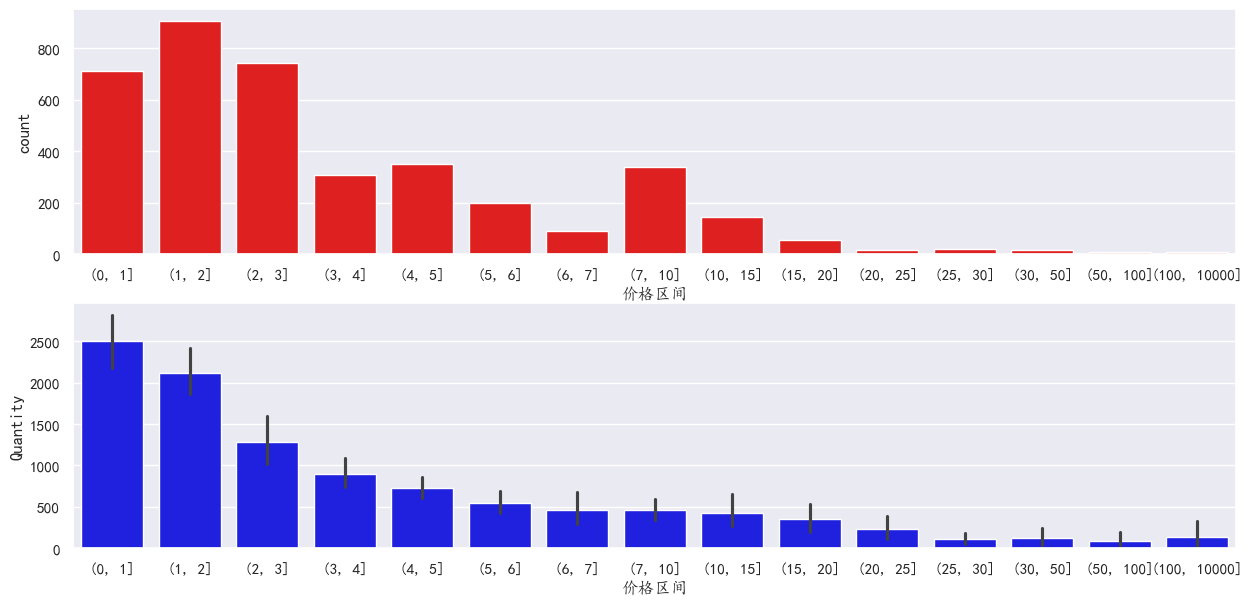

<Figure size 1200x600 with 0 Axes>

In [110]:
fig,axes=plt.subplots(2,1,figsize=(15,7))
plt.figure(figsize=(12, 6)) 
sns.countplot(x=commodity['价格区间'],color='red',ax=axes[0])
sns.barplot(data=commodity,x='价格区间',y="Quantity",color='blue',ax=axes[1])
plt.show()

In [111]:
commodity['UnitPrice'].describe()

count     3925.000000
mean        10.673613
std        279.248605
min          0.000000
25%          1.250000
50%          2.510000
75%          4.950000
max      13541.330000
Name: UnitPrice, dtype: float64

描述统计中看出，商品均价 10.6 > 商品价格的中位数 2.51，属于右偏分布，说明该网站大多售卖低价商品，少部分商品价格昂贵，少数高价商品将均值拉大，商品价格的标准差较大。

从图表中可以看出，商品类别数在价格(0,3]的区间里占比最高；15元以内的商品就占了大部分

图表显示，85.5%的销量集中在价格在3元以内的商品，其中0-1区间的占比最高，区间1-2其次；15元以内的商品销售比例就占据了高达99.7%。

### 2.从用户角度

2.购买金额最多、购买频率最高的顾客

In [112]:
data['单次消费金额']=np.array(data['UnitPrice'])*np.array(data['Quantity'])
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,单次消费金额
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [113]:
# 消费金额top20
customer_data=data.groupby(["CustomerID"])['单次消费金额'].sum().sort_values(ascending=False)
customer_data.head(20)

CustomerID
n        1755276.64
14646     280206.02
18102     259657.30
17450     194550.79
16446     168472.50
14911     143825.06
12415     124914.53
14156     117379.63
17511      91062.38
16029      81024.84
12346      77183.60
16684      66653.56
14096      65164.79
13694      65039.62
15311      60767.90
13089      58825.83
17949      58510.48
15769      56252.72
15061      54534.14
14298      51527.30
Name: 单次消费金额, dtype: float64

In [114]:
# 消费频次top20
customer_buy_freqency=data.drop_duplicates(["InvoiceNo"]).groupby(["CustomerID"])["InvoiceNo"].count().sort_values(ascending=False)
customer_buy_freqency

CustomerID
n        1598
12748     210
14911     201
17841     124
13089      97
         ... 
18249       1
18250       1
18251       1
18255       1
12355       1
Name: InvoiceNo, Length: 4340, dtype: int64

再看看各个国家的顾客的平均消费情况：

In [115]:
data.groupby('Country')['单次消费金额'].mean().sort_values(ascending=False)

Country
Netherlands             120.798282
Australia               116.895620
Japan                   116.561900
Singapore                95.852658
Sweden                   85.096075
China                    55.252817
Denmark                  49.882474
Lithuania                47.458857
Bahrain                  41.896667
Lebanon                  37.641778
EIRE                     35.907520
Brazil                   35.737500
Norway                   33.736418
Czech Republic           33.069600
Finland                  32.913985
Greece                   32.831172
Switzerland              29.023843
United Arab Emirates     27.974706
Israel                   27.577153
Channel Islands          27.340160
Austria                  25.624824
Germany                  25.311562
France                   24.942330
Spain                    24.779521
Malta                    24.335625
Canada                   24.280662
Iceland                  23.681319
Italy                    23.064960
Portugal    

Text(0.5, 0, '平均单次消费水平')

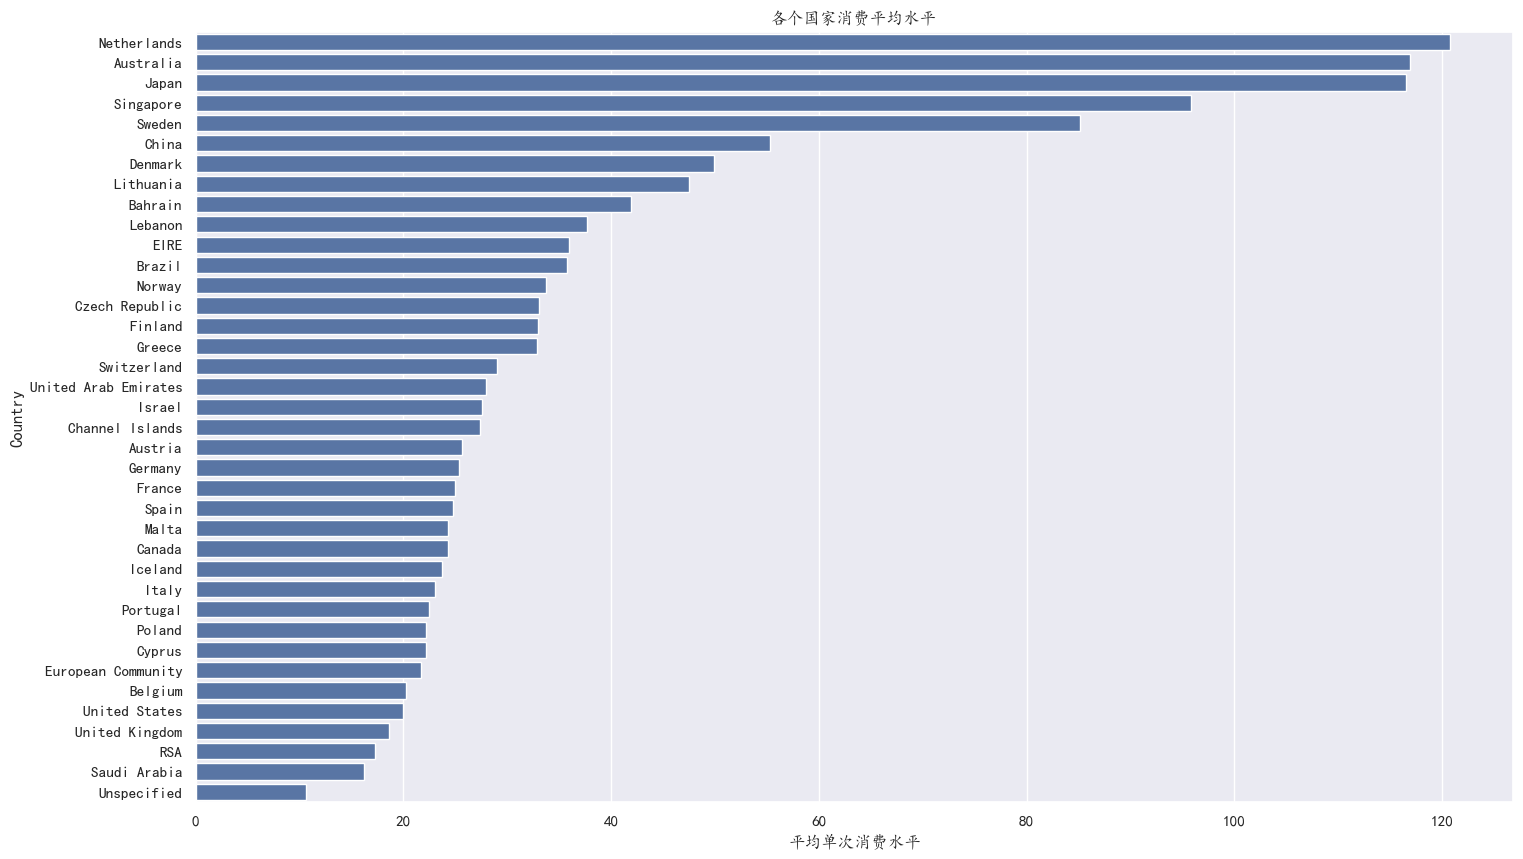

In [116]:
plt.figure(figsize=(17, 10)) 
sns.barplot(data.groupby('Country')['单次消费金额'].mean().sort_values(ascending=False),orient='h')
plt.title('各个国家消费平均水平')
plt.xlabel('平均单次消费水平')

不同国家顾客消费占比

In [117]:

country_total=data.groupby('Country')['单次消费金额'].sum().sort_values(ascending=False)
country_total_per=country_total/country_total.sum()
country_total_per

Country
United Kingdom          0.846113
Netherlands             0.026761
EIRE                    0.026574
Germany                 0.021456
France                  0.019661
Australia               0.012986
Spain                   0.005773
Switzerland             0.005352
Belgium                 0.003862
Sweden                  0.003598
Japan                   0.003508
Norway                  0.003391
Portugal                0.003164
Finland                 0.002114
Singapore               0.001995
Channel Islands         0.001917
Denmark                 0.001777
Italy                   0.001639
China                   0.001471
Cyprus                  0.001274
Austria                 0.000956
Israel                  0.000763
Poland                  0.000688
Greece                  0.000446
Unspecified             0.000445
Iceland                 0.000404
Canada                  0.000344
United States           0.000336
Malta                   0.000256
United Arab Emirates    0.000178
Le

不同国家顾客数量占比

In [118]:
country_customer=data.drop_duplicates(subset=['CustomerID']).groupby('Country')['CustomerID'].count().sort_values(ascending=False)
country_customer_per=country_customer/country_customer.sum()
country_customer_per

Country
United Kingdom          0.903687
Germany                 0.021659
France                  0.020046
Spain                   0.006452
Belgium                 0.005530
Switzerland             0.004608
Portugal                0.004378
Italy                   0.003226
Finland                 0.002765
Norway                  0.002304
Channel Islands         0.002074
Austria                 0.002074
Australia               0.002074
Netherlands             0.002074
Japan                   0.001843
Denmark                 0.001843
Sweden                  0.001843
Cyprus                  0.001613
Poland                  0.001382
Unspecified             0.000922
United States           0.000922
Canada                  0.000922
Greece                  0.000922
Israel                  0.000691
EIRE                    0.000691
United Arab Emirates    0.000461
Bahrain                 0.000461
Malta                   0.000461
Brazil                  0.000230
Lebanon                 0.000230
Ic

这家电商网站有90%的顾客和84%的销售额来自本国英国，然而在顾客的平均消费方面，本国只有不到20元，排名倒数第 4。
去除本国的极端值（图中红色框位置），销售额占比超过1%的国家有荷兰、爱尔兰、德国、法国和澳大利亚；顾客数占比超过1%的国家有德国、法国和爱尔兰；平均顾客消费额最高的国家是荷兰、澳大利亚、日本和瑞典，这些国家可以作为开拓海外市场的重点对象

### 2.4 RFM模型客户细分

对于电子商家来说，它们更希望将客户分组到不同的集群中，以便可以为每个分组进行自定义的营销活动，这会降低获客成本并提升经营收益，要做到这点，经理需要决定要隔离客户的重要业务准则是什么。
聪明的经营者深知 “了解您的客户” 这句话的重要性。经营者必须遵循从增加点击率到留存、忠诚度和建立客户关系的范式转变，而不是简单地专注于生成更多点击次数。与其分析整个客户群，不如将他们细分为同质组，了解每个群体的特点，并让他们参与相关的活动，而不是仅仅细分客户年龄或地理，所以这里采用RFM模型对客户进行细分，以作出精准营销。

In [119]:
customer_data

CustomerID
n        1755276.64
14646     280206.02
18102     259657.30
17450     194550.79
16446     168472.50
            ...    
17956         12.75
16454          6.90
14792          6.20
16738          3.75
13256          0.00
Name: 单次消费金额, Length: 4340, dtype: float64

In [120]:
customer_latest=data.groupby('CustomerID')['InvoiceDate'].max()
customer_latest


CustomerID
12346   2011-01-18 10:01:00
12347   2011-12-07 15:52:00
12348   2011-09-25 13:13:00
12349   2011-11-21 09:51:00
12350   2011-02-02 16:01:00
                ...        
18281   2011-06-12 10:53:00
18282   2011-12-02 11:43:00
18283   2011-12-06 12:02:00
18287   2011-10-28 09:29:00
n       2011-12-09 10:26:00
Name: InvoiceDate, Length: 4340, dtype: datetime64[ns]

这里将整个数据的时间跨度作为参考时段，以已有数据中最后一天为时段边界。

In [121]:

R=(data['InvoiceDate'].max()-customer_latest).dt.days.reset_index()
R

,CustomerID,InvoiceDate
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309
...,...,...
4335,18281,180
4336,18282,7
4337,18283,3
4338,18287,42


消费频率是指用户在规定时段内的总消费次数，在这里即为用户在参考时段内所下的订单数量。

In [122]:
F=customer_buy_freqency.reset_index()
F

,CustomerID,InvoiceNo
0,n,1598
1,12748,210
2,14911,201
3,17841,124
4,13089,97
...,...,...
4335,18249,1
4336,18250,1
4337,18251,1
4338,18255,1


In [123]:
M=data.groupby('CustomerID')['单次消费金额'].sum().reset_index()
M

,CustomerID,单次消费金额
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4335,18281,80.82
4336,18282,178.05
4337,18283,2094.88
4338,18287,1837.28


In [124]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,单次消费金额
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [125]:
customer_sum=customer_data.reset_index()

In [126]:
customer_data=data[['CustomerID','Country']].drop_duplicates(subset=['CustomerID'])
customer_data=pd.merge(customer_data,R,on='CustomerID')


In [127]:
customer_data=pd.merge(customer_data,F,on='CustomerID')
customer_data=pd.merge(customer_data,M,on='CustomerID')

In [128]:
customer_data.columns=['Custome','Country','消费时间间隔R','消费频率F','消费金额M']


In [129]:
customer_data

,Custome,Country,消费时间间隔R,消费频率F,消费金额M
0,17850,United Kingdom,371,34,5391.21
1,13047,United Kingdom,31,10,3237.54
2,12583,France,2,15,7281.38
3,13748,United Kingdom,95,5,948.25
4,15100,United Kingdom,333,3,876.00
...,...,...,...,...,...
4335,13436,United Kingdom,1,1,196.89
4336,15520,United Kingdom,1,1,343.50
4337,13298,United Kingdom,0,1,360.00
4338,14569,United Kingdom,0,1,227.39


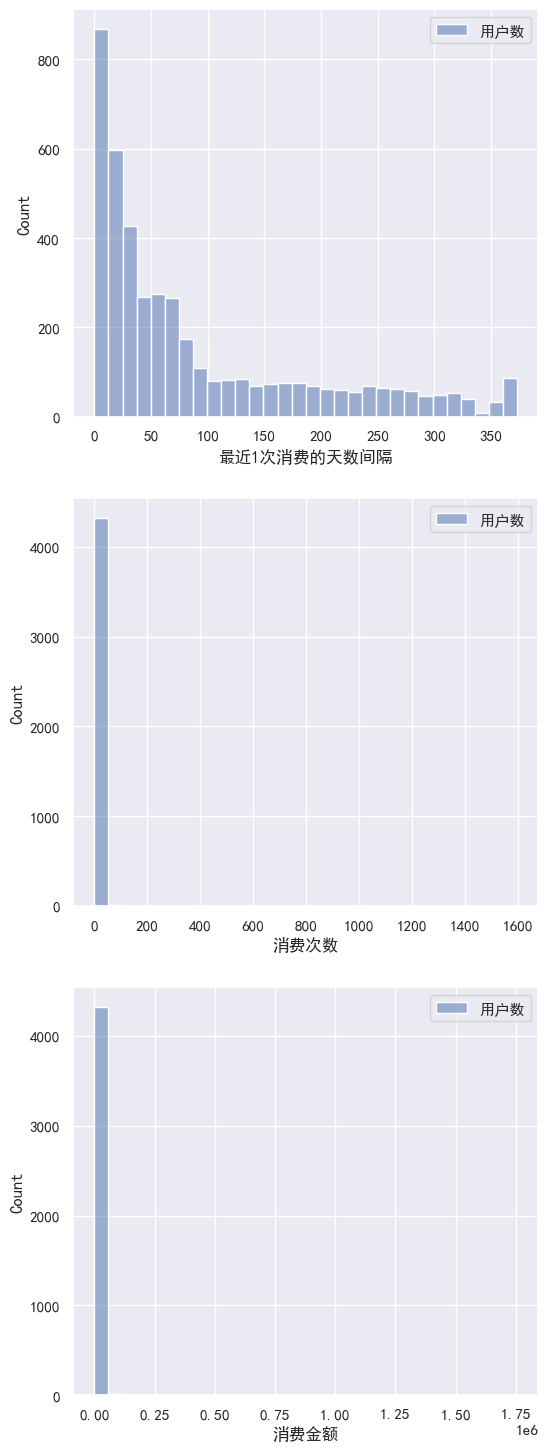

In [138]:


# 设置支持中文的字体
plt.rcParams['font.family'] = 'SimHei'

# 解决负号显示问题
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,18))
plt.subplot(3, 1, 1)
sns.histplot(R,bins=30)
plt.xlabel('最近1次消费的天数间隔')
plt.legend(['用户数'],loc='upper right')
plt.subplot(3, 1, 2)
sns.histplot(F,bins=30)
plt.xlabel('消费次数')
plt.legend(['用户数'],loc='upper right')
plt.subplot(3, 1, 3)
sns.histplot(M,bins=30)
plt.xlabel('消费金额')
plt.legend(['用户数'],loc='upper right')

plt.show()


从图中可以看出 F、M指标存在严重的异常值，标准差极大，查看各个指标的描述性统计：

In [144]:
F.describe()

,InvoiceNo
count,4340.000000
mean,4.639171
std,25.389117
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,1598.000000


In [145]:
M.describe()

,单次消费金额
count,4.340000e+03
mean,2.457761e+03
std,2.808944e+04
min,0.000000e+00
25%,3.073225e+02
50%,6.744850e+02
75%,1.661950e+03
max,1.755277e+06


In [146]:
R.describe()

,InvoiceDate
count,4340.000000
mean,91.497235
std,100.007871
min,0.000000
25%,17.000000
50%,50.000000
75%,141.000000
max,373.000000


上图从左到右依次为 R、F、M 值的描述性统计结果，接下来依据描述性统计结果采用 5 分制分别对 R、F、M 进行打分，这里首先要界定打分的范围阈值，对于商家来说，用户的分数应该取决于各用户的指标值在所有用户指标值中所处的成绩排名，当然打分规则需要依据具体业务来设定，或寻求业务部门协商处理，这里只是指出一项思维作为参考。
取统计描述中的均值为中等成绩，接着在最小值到均值之间取均值，在均值到最大值之间取均值，以此为参考标准制定出打分规则表


In [152]:
Rbins=[0,17,50,91,141,380]
Mbins=[0,300,600,1600,2400,1800000]
Fbins=[0,1,2,3,5,1598]

In [153]:
customer_data['R_score']= pd.cut(customer_data['消费时间间隔R'],Rbins,labels=[5,4,3,2,1],right=False)
customer_data['F_score'] = pd.cut(customer_data['消费频率F'],Fbins,labels=[1,2,3,4,5],right=False)
customer_data['M_score']= pd.cut(customer_data['消费金额M'],Mbins,labels=[1,2,3,4,5],right=False)



In [154]:
customer_data

,Custome,Country,消费时间间隔R,消费频率F,消费金额M,R_score,F_score,M_score
0,17850,United Kingdom,371,34,5391.21,1,5,5
1,13047,United Kingdom,31,10,3237.54,4,5,5
2,12583,France,2,15,7281.38,5,5,5
3,13748,United Kingdom,95,5,948.25,2,5,3
4,15100,United Kingdom,333,3,876.00,1,4,3
...,...,...,...,...,...,...,...,...
4335,13436,United Kingdom,1,1,196.89,5,2,1
4336,15520,United Kingdom,1,1,343.50,5,2,2
4337,13298,United Kingdom,0,1,360.00,5,2,2
4338,14569,United Kingdom,0,1,227.39,5,2,1


In [162]:
customer_data['R_score']=customer_data['R_score'].astype(float)
customer_data['F_score']=customer_data['F_score'].astype(float)
customer_data['M_score']=customer_data['M_score'].astype(float)

In [163]:
customer_data['R_grade'] = np.where(customer_data['R_score']>customer_data['R_score'].mean(),'高','低')
customer_data['F_grade'] = np.where(customer_data['F_score']>customer_data['F_score'].mean(),'高','低')
customer_data['M_grade'] = np.where(customer_data['M_score']>customer_data['M_score'].mean(),'高','低')



In [164]:
customer_data

,Custome,Country,消费时间间隔R,消费频率F,消费金额M,R_score,F_score,M_score,R_grade,F_grade,M_grade
0,17850,United Kingdom,371,34,5391.21,1.0,5.0,5.0,低,高,高
1,13047,United Kingdom,31,10,3237.54,4.0,5.0,5.0,高,高,高
2,12583,France,2,15,7281.38,5.0,5.0,5.0,高,高,高
3,13748,United Kingdom,95,5,948.25,2.0,5.0,3.0,低,高,高
4,15100,United Kingdom,333,3,876.00,1.0,4.0,3.0,低,高,高
...,...,...,...,...,...,...,...,...,...,...,...
4335,13436,United Kingdom,1,1,196.89,5.0,2.0,1.0,高,低,低
4336,15520,United Kingdom,1,1,343.50,5.0,2.0,2.0,高,低,低
4337,13298,United Kingdom,0,1,360.00,5.0,2.0,2.0,高,低,低
4338,14569,United Kingdom,0,1,227.39,5.0,2.0,1.0,高,低,低


In [165]:
customer_data['user_category']=customer_data['R_grade'].str[:]+customer_data['F_grade'].str[:]+customer_data['M_grade'].str[:]
customer_data['user_category'] =customer_data['user_category'].str.strip()
 
def trans(x):
    if x=='高高高':
        return '重要价值客户'
    elif x=='高低高':
        return '重要发展客户'
    elif x=='低高高':
        return '重要保持客户'
    elif x=='低低高':
        return '重要挽留客户'
    elif x=='高高低':
        return '一般价值客户'
    elif x=='高低低':
        return '一般发展客户'
    elif x=='低高低':
        return '一般保持客户'
    else:
        return '一般挽留客户'  
 
customer_data['用户等级']=customer_data['user_category'].apply(trans)
customer_data


,Custome,Country,消费时间间隔R,消费频率F,消费金额M,R_score,F_score,M_score,R_grade,F_grade,M_grade,user_category,用户等级
0,17850,United Kingdom,371,34,5391.21,1.0,5.0,5.0,低,高,高,低高高,重要保持客户
1,13047,United Kingdom,31,10,3237.54,4.0,5.0,5.0,高,高,高,高高高,重要价值客户
2,12583,France,2,15,7281.38,5.0,5.0,5.0,高,高,高,高高高,重要价值客户
3,13748,United Kingdom,95,5,948.25,2.0,5.0,3.0,低,高,高,低高高,重要保持客户
4,15100,United Kingdom,333,3,876.00,1.0,4.0,3.0,低,高,高,低高高,重要保持客户
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,13436,United Kingdom,1,1,196.89,5.0,2.0,1.0,高,低,低,高低低,一般发展客户
4336,15520,United Kingdom,1,1,343.50,5.0,2.0,2.0,高,低,低,高低低,一般发展客户
4337,13298,United Kingdom,0,1,360.00,5.0,2.0,2.0,高,低,低,高低低,一般发展客户
4338,14569,United Kingdom,0,1,227.39,5.0,2.0,1.0,高,低,低,高低低,一般发展客户


In [171]:
s1=customer_data['用户等级'].value_counts().reset_index()
s1

,用户等级,count
0,重要价值客户,1337
1,一般挽留客户,1240
2,一般发展客户,531
3,重要保持客户,456
4,重要挽留客户,368
5,重要发展客户,191
6,一般保持客户,116
7,一般价值客户,101


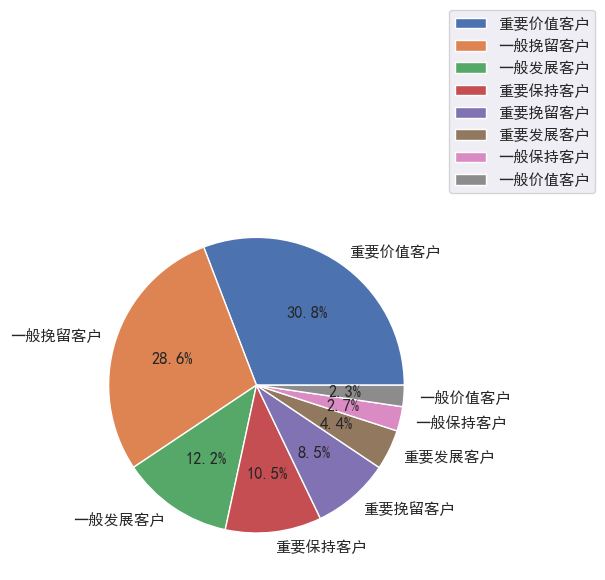

In [176]:
plt.pie(s1['count'],labels=s1['用户等级'],autopct='%.1f%%')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## 结论

从商品的角度来看，该网站的情况如下：
1、该网站热卖最多的前 20 名的商品是哪些，退货最多的前 20 名商品又是哪些；
2、该网站以批发售卖低价产品为主，97% 的商品单价在 15 以内，低价售卖的商品中，0 - 3 价格区间的商品数最多，占据了 60% 左右；
3、商品的销售量方面，该网站 95% 的销量集中在单价为 5 以内，这其中又以在 0 - 2 价位区间的商品最为畅销，占了 72% 左右。
4、该网站 94% 的退货商品的价格低于 5，其中价格在 1-3 区间的商品退货量最多，占到 78% 左右。对于退货商品种类而言，1-2 价位区间的退货种类数最多，其次，在 4-5 和 7-10 价位也有较多的退货商品种数。

从顾客的角度来看，该网站的情况如下：
1、购买金额最多和购买次数最频繁的顾客是哪些；
2、成功交易的订单中大部分商品种数在 100 以内，其中 75% 的订单的商品种数都是在 28 种以下；而退货订单中的商品种数大多在 10 以内；
3、这家电商网站有 91% 的顾客和 84% 的销售额来自国内，相对来说，国内的顾客价值更高；国外方面，销售额较高的国家有荷兰、爱尔兰、德国、法国和澳大利亚；顾客数较多的国家有德国、法国、爱尔兰；平均顾客消费比较高的国家有荷兰、澳大利亚、日本和瑞典；
4、该网站有 35% 的顾客是重要价值客户，有 38% 的顾客为一般挽留、发展客户，重要挽留、保持、发展客户各占 9%、8%、7% ，余下为其他类型顾客。
